<a href="https://colab.research.google.com/github/Jay0xd/biological_boolean_network_modeling/blob/main/DeepLearningMLP_practical_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network practical course

For this practical course we will use a deep multilayer perceptron to classify patients into two classes: chronic kidney disease, no chronic kidney disease.
The dataset can be downloaded from: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease#


## The Data

We will use a data frame with 400 instances on the following 24 variables.
* Attribute Information:
We use 24 ( 11 numeric, 13 nominal)

1.Age(numerical)
age in years

2.Blood Pressure(numerical)
bp in mm/Hg

3.Specific Gravity(nominal??)
sg - (1.005,1.010,1.015,1.020,1.025)

4.Albumin(nominal??)
al - (0,1,2,3,4,5)

5.Sugar(nominal??)
su - (0,1,2,3,4,5)

6.Red Blood Cells(nominal)
rbc - (normal,abnormal)

7.Pus Cell (nominal)
pc - (normal,abnormal)

8.Pus Cell clumps(nominal)
pcc - (present,notpresent)

9.Bacteria(nominal)
ba - (present,notpresent)

10.Blood Glucose Random(numerical)
bgr in mgs/dl

11.Blood Urea(numerical)
bu in mgs/dl

12.Serum Creatinine(numerical)
sc in mgs/dl

13.Sodium(numerical)
sod in mEq/L

14.Potassium(numerical)
pot in mEq/L

15.Hemoglobin(numerical)
hemo in gms

16.Packed Cell Volume(numerical)

17.White Blood Cell Count(numerical)
wc in cells/cumm

18.Red Blood Cell Count(numerical)
rc in millions/cmm

19.Hypertension(nominal)
htn - (yes,no)

20.Diabetes Mellitus(nominal)
dm - (yes,no)

21.Coronary Artery Disease(nominal)
cad - (yes,no)

22.Appetite(nominal)
appet - (good,poor)

23.Pedal Edema(nominal)
pe - (yes,no)

24.Anemia(nominal)
ane - (yes,no)

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [16]:
import tensorflow as tf
from keras import layers
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Input, Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#from keras.utils import np_utils
import pandas as pd
import numpy as np

## Get the Data

** Read in the "chronic_kidney_disease" file using read_csv.**

In [3]:
import pandas as pd

data = []
with open('chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']

df = pd.DataFrame(data[145:], columns=names)

**Check the head of the data**

In [4]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,None
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,None
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,None
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,None
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,None


** Check the info() and describe() methods on the data.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      402 non-null    object
 1   bp       400 non-null    object
 2   sg       400 non-null    object
 3   al       400 non-null    object
 4   su       400 non-null    object
 5   rbc      400 non-null    object
 6   pc       400 non-null    object
 7   pcc      400 non-null    object
 8   ba       400 non-null    object
 9   bgr      400 non-null    object
 10  bu       400 non-null    object
 11  sc       400 non-null    object
 12  sod      400 non-null    object
 13  pot      400 non-null    object
 14  hemo     400 non-null    object
 15  pcv      400 non-null    object
 16  wbcc     400 non-null    object
 17  rbcc     400 non-null    object
 18  htn      400 non-null    object
 19  dm       400 non-null    object
 20  cad      400 non-null    object
 21  appet    400 non-null    object
 22  pe

In [6]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
count,402,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,3
unique,78,11,6,7,7,3,3,3,3,147,...,93,50,3,7,4,4,4,3,4,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,no,no,no,good,no,no,ckd,
freq,19,116,106,199,290,201,259,354,374,44,...,105,130,251,257,362,316,322,339,248,2


# Data Preparation

In [31]:
# Separate the labels from the variables
data = df.drop("class", axis =1)
labels = df["class"]

In [33]:
# Replace missing values with a median (or means , zeros, etc.)


from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy="median")

#Create a copy without text attribute
#"sg", "al", "su"
#Nominal attributes:"rbc","pc","pcc","ba","htn","dm", "cad", "appet", "pe", "ane"
data_num = data[["age", "bp","sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo","pcv", "wbcc", "rbcc"]]


In [34]:
data_num.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,402,400,400,400,400,400,400,400,400,400,400,400,400,400
unique,78,11,6,7,7,147,119,87,35,43,119,45,93,50
top,60,80,1.020,0,0,?,?,1.2,?,?,?,?,?,?
freq,19,116,106,199,290,44,19,40,87,88,52,70,105,130


In [44]:
data_num = data_num.apply(pd.to_numeric, errors='coerce')#fit the imputer instance to the data
imputer.fit(data_num)
#imputer.statistics_
data_num.median().values

array([5.500e+01, 8.000e+01, 1.020e+00, 0.000e+00, 0.000e+00, 1.210e+02,
       4.200e+01, 1.300e+00, 1.380e+02, 4.400e+00, 1.265e+01, 4.000e+01,
       8.000e+03, 4.800e+00])

In [45]:
#trasform the dataset by replacing the missing values by the medians
X = imputer.transform(data_num)
data_tr = pd.DataFrame(X, columns = data_num.columns)

In [ ]:
data_tr.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000


Handling categorical attributes (optional)

In [46]:
data_cat = data[["rbc","pc","pcc","ba","htn","dm", "cad", "appet", "pe", "ane"]]
#Use the pandas functions : factorize(), Imputer with the "most_frequent" strategy, OneHotEncoder()


## Data Visualization

It's time to create some data visualizations!


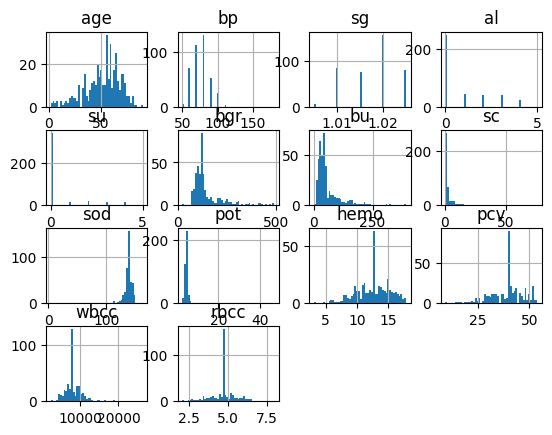

In [47]:
#Plot a histogram for each attribute
data_tr.hist(bins=50)
plt.show()
#"age", "bp","sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo","pcv", "wbcc", "rbcc"

In [48]:
# Data normalization
scaler =  preprocessing.StandardScaler().fit(data_tr)
data_tr = scaler.transform(data_tr)

# transform the labels
classes = labels.map(lambda x :0 if x=='ckd' else 1)

In [49]:
#Data spliting
x_train, x_test, y_train, y_test = train_test_split(data_tr, classes, test_size=0.2, random_state=42)
print(y_train.shape)
print(x_train.shape)
print(x_train.shape[1])

classes_train = tf.keras.utils.to_categorical(y_train)
classes_test = tf.keras.utils.to_categorical(y_test)
print(classes_train.shape)
print(classes_test.shape)

(321,)
(321, 14)
14
(321, 2)
(81, 2)


# Model learning

**You will apply the different deep learning tools that allow to improve the results**
1. Built a deeep learning model with 5 hidden layers
2. Apply the early stopping function that allows to stop the training step when the test error starts increasing
3. Apply L1, then L2 regularization
4. Apply Dropout
5. Change the gradient descent optimization algorithm

In [51]:
# Import the early stopping library
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


# Import the dropout library


# Import the library of regulizers


#parameters



# Create & train the Deep MLP model with 5 hidden layers


# Add the hidden layers and the regulizers

# Add dropout for each hidden layer


# Compile the model for a multi-class classification problem


# Add early stoping


In [57]:
# Import the early stopping library
from keras.callbacks import EarlyStopping

# Import the dropout library
from keras.layers import Dropout

# Import the library of regulizers
from keras import regularizers

#parameters
nb_features = 14
learning_rate = 0.01
opt = 'SGD'
hidden1_drop = 0.3
hidden2_drop = 0.3
hidden3_drop = 0.3
hidden4_drop = 0.3
input_drop = 0.2
lambda_l1 = 0.001
lambda_l2 = 0
size_batch= 250
nb_epochs = 50

# Create & train the Deep MLP model with 4 hidden layers
model = Sequential()

# Add the first hidden layer
model.add(Dense(30, input_dim = nb_features, activation='relu', kernel_regularizer=regularizers.l1(lambda_l1)))
#model.add(Activation('relu'))
#model.add(Dropout(input_drop))

# Add the second hidden layer
model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(lambda_l1)))
#model.add(Dropout(hidden1_drop))

# Add the third hidden layer
model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l1(lambda_l1)))
#model.add(Dropout(hidden2_drop))

# Add the fourth hidden layer
model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l1(lambda_l1)))
#model.add(Dropout(hidden3_drop))

# Add the fifth hidden layer
model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l1(lambda_l1)))
#model.add(Dropout(hidden4_drop))

# # Add the output layer
model.add(Dense(2, activation='softmax', kernel_regularizer=regularizers.l1(lambda_l1)))

# For a multi-class classification problem
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#  kernel_regularizer=regularizers.l2(0.01),
               # activity_regularizer=regularizers.l1(0.01))))

es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience = 100)

history = model.fit(x_train, classes_train, validation_data=(x_test, classes_test), batch_size = size_batch, epochs=nb_epochs, verbose=1, callbacks=[es])



Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - accuracy: 0.4128 - loss: 1.0643 - val_accuracy: 0.4568 - val_loss: 1.0472
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4293 - loss: 1.0605 - val_accuracy: 0.4691 - val_loss: 1.0430
Epoch 3/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4200 - loss: 1.0607

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4287 - loss: 1.0582 - val_accuracy: 0.4691 - val_loss: 1.0398
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4319 - loss: 1.0540 - val_accuracy: 0.5556 - val_loss: 1.0361
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3993 - loss: 1.0503 - val_accuracy: 0.5679 - val_loss: 1.0323
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4297 - loss: 1.0459 - val_accuracy: 0.6049 - val_loss: 1.0288
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4244 - loss: 1.0430 - val_accuracy: 0.6049 - val_loss: 1.0254
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4389 - loss: 1.0399 - val_accuracy: 0.6173 - val_loss: 1.0220
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.4376 - loss: 1.0373 - val_accuracy: 0.6173 - val_loss: 1.0194
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.4729 - loss: 1.0344 - val_accuracy: 0.5802 - val_loss: 1.0167
Epoch 11/5

In [61]:
# Evalute the model
score = model.evaluate(x_test, classes_test, batch_size=size_batch, verbose=1)
print("Scores on test set: loss=%s accuracy=%s" % tuple(score))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6667 - loss: 0.9511
Scores on test set: loss=0.9511208534240723 accuracy=0.6666666865348816


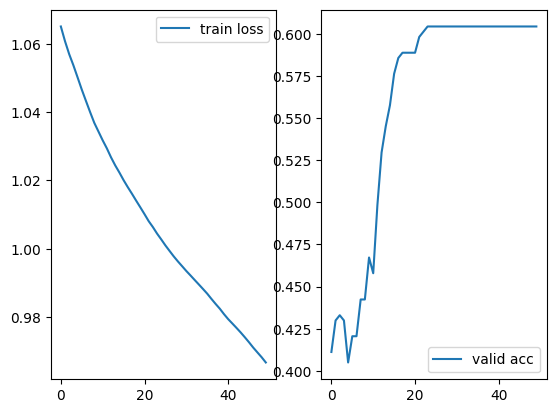

In [63]:
# plot the train loss and the validation loss
plt.figure(1)

plt.subplot(1,2,1)
out = np.asarray(history.history['loss'])
plt.plot(out, label='train loss')
plt.legend()

plt.subplot(1,2,2)
out = np.asarray(history.history['accuracy'])
plt.plot(out, label='valid acc')
plt.legend()

plt.show()

**Compute the cross validation error**

In [71]:
!pip install scikit_learn
!pip install tensorflow


In [69]:
# Import the libraries


from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# create an MLP model
def create_MLP_model():

    return model

estimators = []
estimators.append(('standardize', preprocessing.StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_MLP_model, epochs=nb_epochs, batch_size=size_batch, verbose=0)))
pipeline = Pipeline(estimators)

# Compute the cross validation error


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

## Confusion matrix

** Create a confusion matrix to see how well the MLP classify the different classes

**Autoencoder**
Autoencoders are similar to dimensionality reduction techniques like Principal Component Analysis (PCA) that projects the data from a higher dimension to a lower dimension using linear transformation.
However, the major difference between autoencoders and PCA lies in the transformation part: as you already read, PCA uses linear transformation whereas autoencoders use non-linear transformations.

In [ ]:
# Build a sparse autoencoder

# Build a denoising autoencoder
